In [1]:
import time

start = time.time()

In [2]:
#swifter is a library that intelligently applies operations to Pandas DataFrames,
#automatically choosing the fastest method (vectorized, Dask, or regular Pandas)
#based on the data size and the operation.

!pip install swifter

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import swifter

In [4]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# Load the dataset
try:
    df = pd.read_csv('/content/sentimentdataset.csv')
except FileNotFoundError:
    print("Error: 'sentimentdataset Dataset.csv' not found. Please download it from Kaggle and place it in the current directory.")
    exit()

In [6]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [7]:
print("\nDataset shape:")
print(df.shape)
print("\nData types:")
print(df.info())


Dataset shape:
(732, 15)

Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
None


In [8]:
print("\nSentiment label distribution:")
print(df['Sentiment'].value_counts())


Sentiment label distribution:
Sentiment
Neutral     341
Positive    286
Negative    105
Name: count, dtype: int64


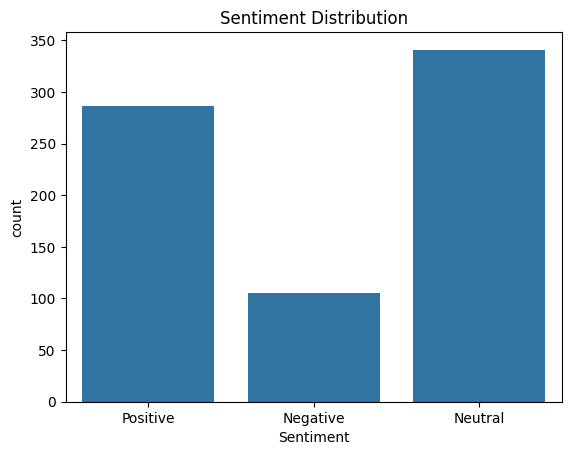

In [9]:
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

In [10]:
stopwords_set = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub('<[^>]*>', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords_set]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [11]:

df['Text'] = df['Text'].swifter.apply(preprocess_text)

Pandas Apply:   0%|          | 0/732 [00:00<?, ?it/s]

In [12]:
print("\nPreprocessed text (first 5 rows):")
print(df['Text'].head())


Preprocessed text (first 5 rows):
0         enjoying beautiful day park
1            traffic terrible morning
2            finished amazing workout
3    excited upcoming weekend getaway
4    trying new recipe dinner tonight
Name: Text, dtype: object


In [13]:
# !pip install wordcloud

In [14]:
from wordcloud import WordCloud

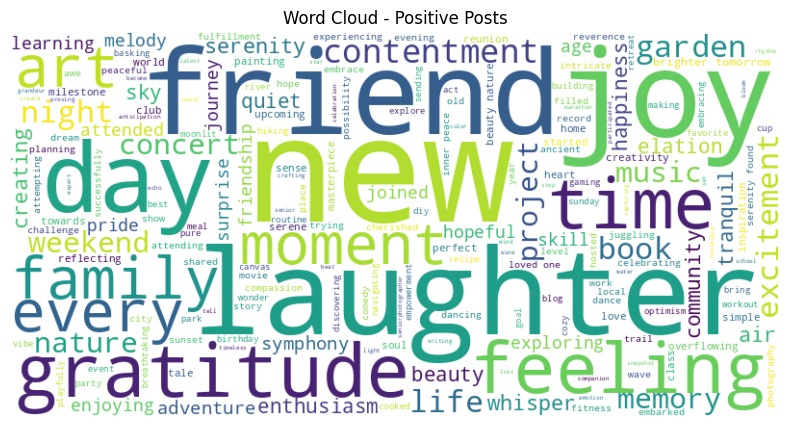

In [15]:
# Word Cloud for positive post
positive_reviews = ' '.join(df[df['Sentiment'] == 'Positive']['Text'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud - Positive Posts')
plt.axis('off')
plt.show()

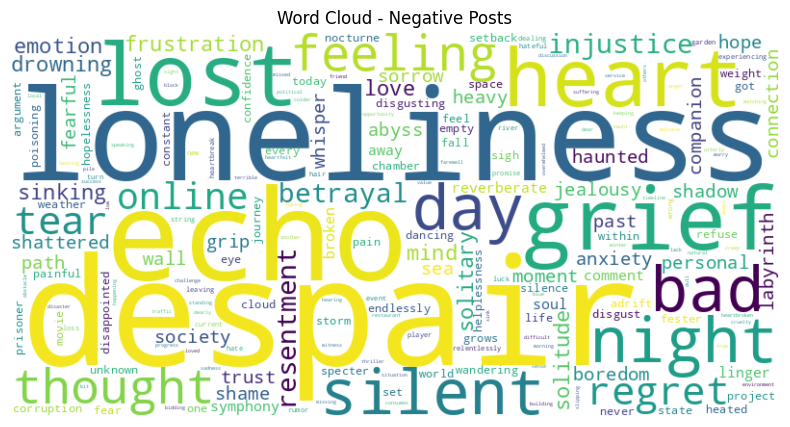

In [16]:
# Word Cloud for negative post
negative_reviews = ' '.join(df[df['Sentiment'] == 'Negative']['Text'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud - Negative Posts')
plt.axis('off')
plt.show()

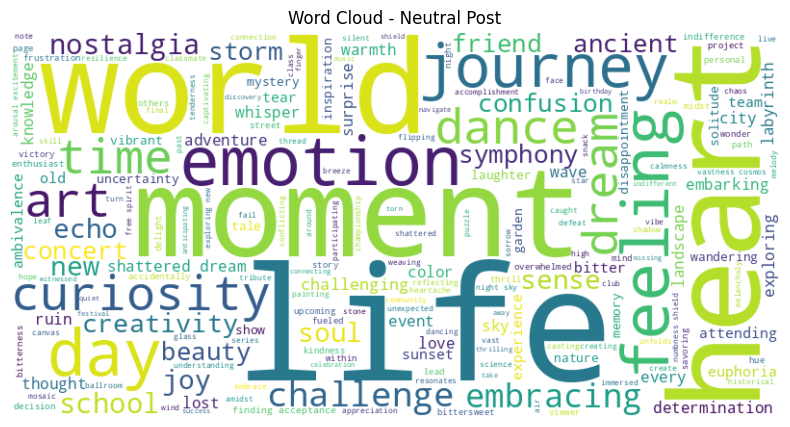

In [17]:
# Word Cloud for neutral post
neutral_reviews = ' '.join(df[df['Sentiment'] == 'Neutral']['Text'])
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Word Cloud - Neutral Post')
plt.axis('off')
plt.show()

In [18]:
# Average review length per sentiment
df['Text_length'] = df['Text'].apply(lambda x: len(x.split()))
avg_length = df.groupby('Sentiment')['Text_length'].mean()
print("\nAverage Text length per sentiment:")
print(avg_length)


Average Text length per sentiment:
Sentiment
Negative    7.019048
Neutral     8.741935
Positive    7.814685
Name: Text_length, dtype: float64


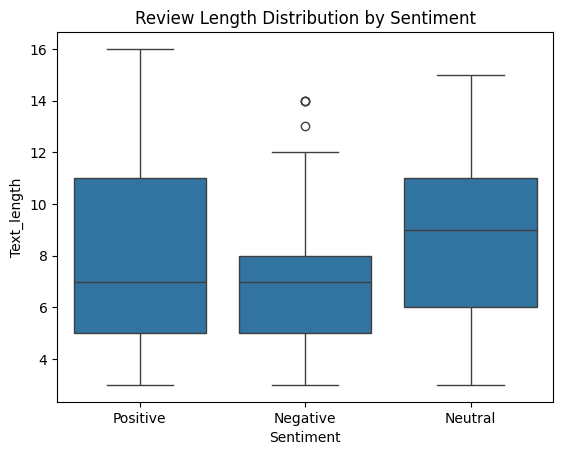

In [19]:
sns.boxplot(x='Sentiment', y='Text_length', data=df)
plt.title('Review Length Distribution by Sentiment')
plt.show()

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [21]:
vectorizer_bow = CountVectorizer()

In [22]:
X_bow = vectorizer_bow.fit_transform(df['Text'])

In [23]:
df_bow = pd.DataFrame(X_bow.toarray(), columns=vectorizer_bow.get_feature_names_out())

In [24]:
print("Shape of BoW matrix:", X_bow.shape)

Shape of BoW matrix: (732, 2274)


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
vectorizer_tfidf = TfidfVectorizer()

In [27]:
X_tfidf = vectorizer_tfidf.fit_transform(df['Text'])

In [28]:
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())

In [29]:
print("\nShape of TF-IDF matrix:", X_tfidf.shape)


Shape of TF-IDF matrix: (732, 2274)


In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'])

In [32]:
X_bow_train, X_bow_test, y_bow_train, y_bow_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [33]:
print("\nBoW Training set shape:", X_bow_train.shape, y_bow_train.shape)
print("BoW Testing set shape:", X_bow_test.shape, y_bow_test.shape)
print("\nTF-IDF Training set shape:", X_tfidf_train.shape, y_tfidf_train.shape)
print("TF-IDF Testing set shape:", X_tfidf_test.shape, y_tfidf_test.shape)


BoW Training set shape: (585, 2274) (585,)
BoW Testing set shape: (147, 2274) (147,)

TF-IDF Training set shape: (585, 2274) (585,)
TF-IDF Testing set shape: (147, 2274) (147,)


In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
import joblib  # For saving the model

In [35]:
models = {
    'Naive Bayes (BoW)': MultinomialNB(),
    'Logistic Regression (BoW)': LogisticRegression(max_iter=1000),
    'SVM (BoW)': SVC(kernel='linear', probability=True),
    'Random Forest (BoW)': RandomForestClassifier(n_jobs=-1),
    'Naive Bayes (TF-IDF)': MultinomialNB(),
    'Logistic Regression (TF-IDF)': LogisticRegression(max_iter=1000),
    'SVM (TF-IDF)': SVC(kernel='linear', probability=True),
    'Random Forest (TF-IDF)': RandomForestClassifier(n_jobs=-1)
}

In [36]:
results = {}

for name, model in models.items():
    if 'BoW' in name:
        model.fit(X_bow_train, y_bow_train)
        y_pred = model.predict(X_bow_test)
    else:
        model.fit(X_tfidf_train, y_tfidf_train)
        y_pred = model.predict(X_tfidf_test)

    f1_macro = f1_score(y_bow_test if 'BoW' in name else y_tfidf_test, y_pred, average='macro')
    results[name] = f1_macro
    print(f"{name} - Macro-average F1 Score: {f1_macro:.4f}")

Naive Bayes (BoW) - Macro-average F1 Score: 0.6404
Logistic Regression (BoW) - Macro-average F1 Score: 0.6020
SVM (BoW) - Macro-average F1 Score: 0.6735
Random Forest (BoW) - Macro-average F1 Score: 0.5798
Naive Bayes (TF-IDF) - Macro-average F1 Score: 0.4600
Logistic Regression (TF-IDF) - Macro-average F1 Score: 0.4549
SVM (TF-IDF) - Macro-average F1 Score: 0.5221
Random Forest (TF-IDF) - Macro-average F1 Score: 0.4855


In [37]:
# Find the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name}")


Best Model: SVM (BoW)


In [38]:
if 'BoW' in best_model_name:
    joblib.dump((best_model, vectorizer_bow, label_encoder), 'sentiment_model_bow.joblib')
else:
    joblib.dump((best_model, vectorizer_tfidf, label_encoder), 'sentiment_model_tfidf.joblib')

print("\nBest model saved as 'sentiment_model_bow.joblib' or 'sentiment_model_tfidf.joblib'")


Best model saved as 'sentiment_model_bow.joblib' or 'sentiment_model_tfidf.joblib'


In [39]:
# !pip install streamlit
# !streamlit run app_sentiment.py

In [40]:
end = time.time()
print(start)
print(end)
print(end-start)

1745138860.3031836
1745138888.1832538
27.880070209503174


<p style="text-align:center;">That's it! Congratulations! <br>
    Let's now work on your lab assigment.</p>